In [1]:
import pandas as pd
import numpy as np

In [2]:
a=pd.read_csv('ticdata2000.txt',sep='\t',header=None)
target=a[85]
data=a.drop(85,axis='columns')

In [3]:
a.head()

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0


In [4]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,0,1,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,0,1,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,0,1,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,0,1,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,0,1,0,0,0,0,0


In [5]:
target.head()

0    0
1    0
2    0
3    0
4    0
Name: 85, dtype: int64

In [6]:
x_test=pd.read_csv('ticeval2000.txt',sep='\t',header=None)

In [7]:
x_test.head()

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
0,33,1,4,2,8,0,6,0,3,5,...,0,0,0,0,1,0,0,0,0,0
1,6,1,3,2,2,0,5,0,4,5,...,2,0,0,0,1,0,0,0,0,0
2,39,1,3,3,9,1,4,2,3,5,...,1,0,0,0,1,0,0,0,0,0
3,9,1,2,3,3,2,3,2,4,5,...,0,0,0,0,1,0,0,0,0,0
4,31,1,2,4,7,0,2,0,7,9,...,0,0,0,0,1,0,0,0,0,0


In [8]:
y_test=pd.read_csv('tictgts2000.txt',sep='\t',header=None)

In [9]:
y_test.head()

,0
0,0
1,1
2,0
3,0
4,0


In [10]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0,max_iter=1500).fit(data, target)

In [11]:
pred=clf.predict(x_test)

In [12]:
print(y_test)

      0
0     0
1     1
2     0
3     0
4     0
...  ..
3995  0
3996  1
3997  0
3998  0
3999  0

[4000 rows x 1 columns]


In [13]:
clf.score(x_test, y_test)


0.94

Text(0, 0.5, 'True Positive Rate')

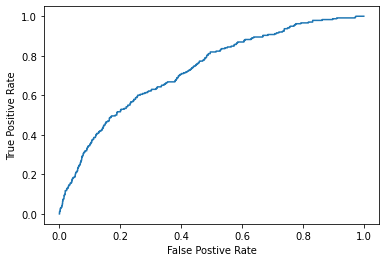

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
y_pred_prob=clf.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot(fpr,tpr,label="Logistic Regression")
plt.xlabel('False Postive Rate')
plt.ylabel('True Positive Rate')

In [20]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_prob)

0.7281818628567854